In [1]:
import tensorflow as tf
from PIL import Image
import numpy as np
import os

In [2]:
train_path = "./MNIST_FC/mnist_image_label/mnist_train_jpg_60000/"
train_txt = "./MNIST_FC/mnist_image_label/mnist_train_jpg_60000.txt"
x_train_savepath = "./MNIST_FC/mnist_image_label/mnist_x_train.npy"
y_train_savepath = "./MNIST_FC/mnist_image_label/mnist_y_train.npy"

test_path = "./MNIST_FC/mnist_image_label/mnist_test_jpg_10000/"
test_txt = "./MNIST_FC/mnist_image_label/mnist_test_jpg_10000.txt"
x_test_savepath = "./MNIST_FC/mnist_image_label/mnist_x_test.npy"
y_test_savepath = "./MNIST_FC/mnist_image_label/mnist_y_test.npy"

In [8]:
def generateds(path,txt):
    f = open(txt,'r')
    contents = f.readlines()
    f.close()
    x, y_ = [],[]
    for content in contents:
        value = content.split()
        img_path = os.path.join(path, value[0])
        img  = Image.open(img_path)
        img = np.array(img.convert('L'))
        img = img/255.0
        x.append(img)
        y_.append(value[1])
        print('loading:',content)
    x = np.array(x)
    y_ = np.array(y_)
    y_ = y_.astype(np.int64)
    return x, y_

if os.path.exists(x_train_savepath) and os.path.exists(y_train_savepath) and os.path.exists(x_test_savepath) and os.path.exists(y_test_savepath):
    print("--------------------------load data--------------------------")
    x_train_save = np.load(x_train_savepath)
    y_train = np.load(y_train_savepath)
    x_test_save = np.load(x_test_savepath)
    y_test = np.load(y_test_savepath)
    x_train = np.reshape(x_train_save,(len(x_train_save),28,28))
    x_test = np.reshape(x_test_save,(len(x_test_save),28,28))
else:
    print("-----------------generate data---------------------------")
    x_train, y_train = generateds(train_path, train_txt)
    x_test, y_test = generateds(test_path, test_txt)
    
    print("---------------------Save Datasets----------------------")
    x_train_save = np.reshape(x_train, (len(x_train),-1))
    x_test_save = np.reshape(x_test,(len(x_test),-1))
    np.save(x_train_savepath,x_train_save)
    np.save(y_train_savepath, y_train)
    np.save(x_test_savepath, x_test_save)
    np.save(y_test_savepath,y_test)
    

model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(10, activation= 'softmax')
    ])
model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['sparse_categorical_accuracy'])

model.fit(x_train,y_train,batch_size=32,epochs=5,validation_data=(x_test, y_test), validation_freq=1)

--------------------------load data--------------------------
Epoch 1/5
1875/1875 [==============================] - 2s 803us/step - loss: 0.4331 - sparse_categorical_accuracy: 0.8771 - val_loss: 0.1507 - val_sparse_categorical_accuracy: 0.9544
Epoch 2/5
1875/1875 [==============================] - 1s 737us/step - loss: 0.1253 - sparse_categorical_accuracy: 0.9640 - val_loss: 0.0992 - val_sparse_categorical_accuracy: 0.9690
Epoch 3/5
1875/1875 [==============================] - 1s 754us/step - loss: 0.0772 - sparse_categorical_accuracy: 0.9764 - val_loss: 0.0903 - val_sparse_categorical_accuracy: 0.9709
Epoch 4/5
1875/1875 [==============================] - 1s 696us/step - loss: 0.0603 - sparse_categorical_accuracy: 0.9821 - val_loss: 0.0766 - val_sparse_categorical_accuracy: 0.9751
Epoch 5/5
1875/1875 [==============================] - 1s 709us/step - loss: 0.0423 - sparse_categorical_accuracy: 0.9876 - val_loss: 0.0762 - val_sparse_categorical_accuracy: 0.9761


In [9]:
# 数据增强
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np


In [29]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0],28,28,1)

image_gen_train = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=45,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=False,
    zoom_range=0.5
)

image_gen_train.fit(x_train)
print("xtrain:",x_train.shape)
x_train_subset1 = np.squeeze(x_train[:12])
print("xtrain_subset1:",x_train_subset1.shape)
print("xtrain:",x_train.shape)
x_train_subset2 = x_train[:12]
print("x_train_subset2",x_train_subset2.shape)


xtrain: (60000, 28, 28, 1)
xtrain_subset1: (12, 28, 28)
xtrain: (60000, 28, 28, 1)
x_train_subset2 (12, 28, 28, 1)


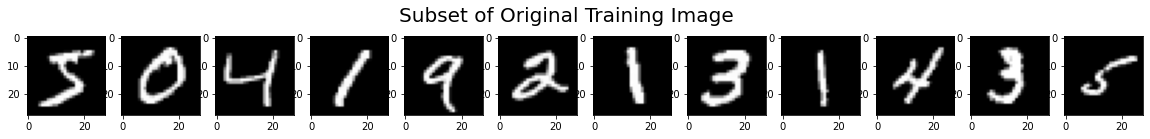

In [18]:
fig = plt.figure(figsize=(20,2))
plt.set_cmap('gray')

for i in range(0,len(x_train_subset1)):
    ax = fig.add_subplot(1,12,i+1)
    ax.imshow(x_train_subset1[i])
fig.suptitle('Subset of Original Training Image', fontsize=20)
plt.show()

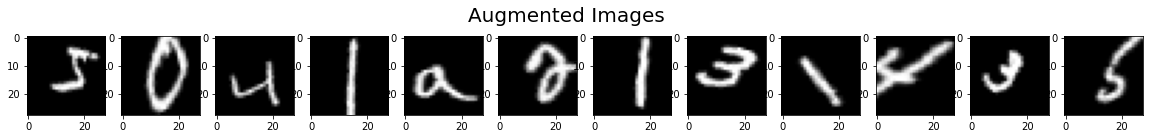

In [19]:
# 显示增强后的图片
fig = plt.figure(figsize=(20,2))
for x_batch in image_gen_train.flow(x_train_subset2, batch_size=12, shuffle=False):
    for i in range(0,12):
        ax = fig.add_subplot(1,12,i+1)
        ax.imshow(np.squeeze(x_batch[i]))
    fig.suptitle("Augmented Images",fontsize=20)
    plt.show()
    break;

In [30]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train,x_test = x_train/255.0,x_test/255.0
x_train = x_train.reshape(len(x_train),28,28,1)

image_gen_train = ImageDataGenerator(rescale=1./1.,
                                    rotation_range=45,
                                    width_shift_range=.15,
                                    height_shift_range=.15,
                                    horizontal_flip=False,
                                    zoom_range=0.5)
image_gen_train.fit(x_train)


model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])
model.fit(image_gen_train.flow(x_train,y_train, batch_size=32),epochs=5, validation_data=(x_test,y_test),validation_freq=1)
model.summary()

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 2.2356 - sparse_categorical_accuracy: 0.1777 - val_loss: 113.4163 - val_sparse_categorical_accuracy: 0.2515
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 2.0751 - sparse_categorical_accuracy: 0.2539 - val_loss: 136.7827 - val_sparse_categorical_accuracy: 0.2728gorical_a
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 2.0307 - sparse_categorical_accuracy: 0.2728 - val_loss: 150.2327 - val_sparse_categorical_accuracy: 0.3023
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 1.9911 - sparse_categorical_accuracy: 0.2909 - val_loss: 151.4948 - val_sparse_categorical_accuracy: 0.3123
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 1.9169 - sparse_categorical_accuracy: 0.3277 - val_loss: 147.9671 - val_sparse_categorical_accuracy: 0.3293
Model: "sequential_2"
_________________________________________________